
# Classificação por isolamento de frequência
Neste notebook será realizado um exemplo de classificação, isolando todas as frequências estimuladas no conjunto de dados AVI SSVEP simplificado para um participante.

### Passos para a realização da classificação:
1. Carrega o arquivo fif (mne.EpochsArray);
2. Obter a \"energia\" do sinal por meio do cálculo `compute_psd` para os dados no domínio do tempo;
4. Com os dados PSD, encontre o valor máximo para cada _trial_ e compare com o valor que está sendo evocado.
5. Por fim, acumule os acertos para mostrar uma acurácia simples.

Reading c:\Users\catar\Downloads\multi\multi\src\ssvep-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...   15998.05 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Acurácia: 58.00%


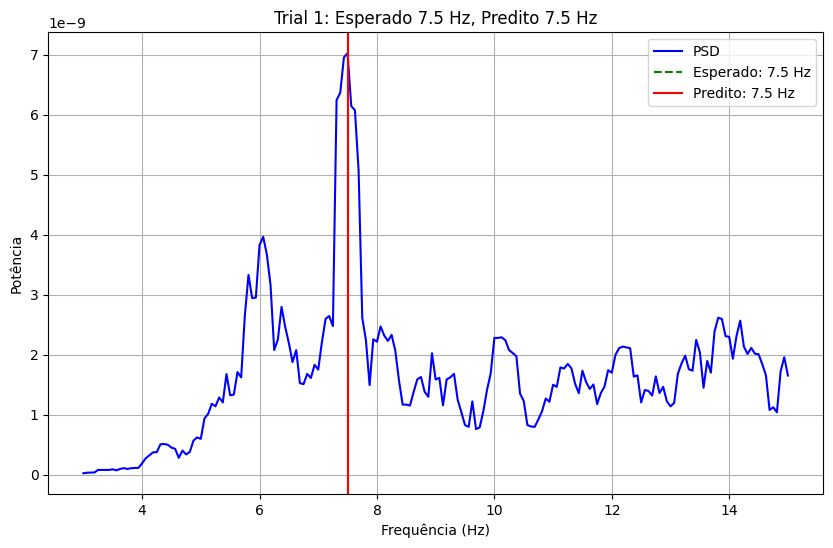

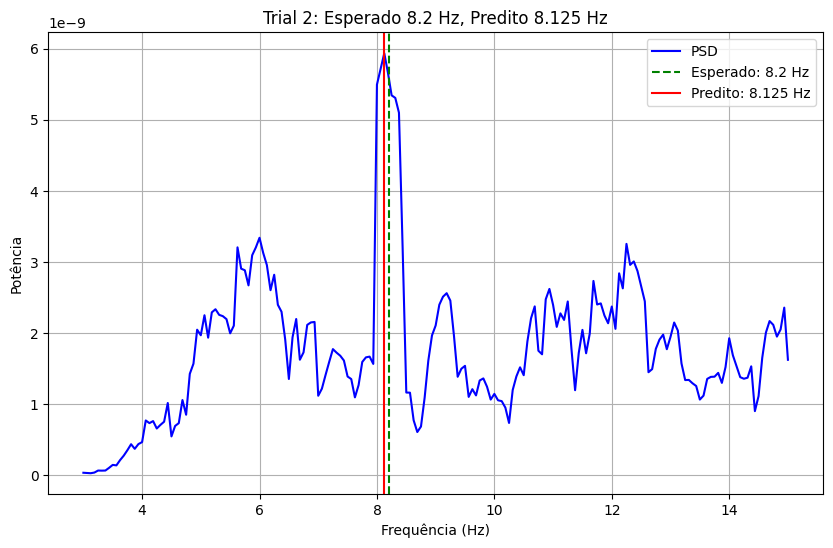

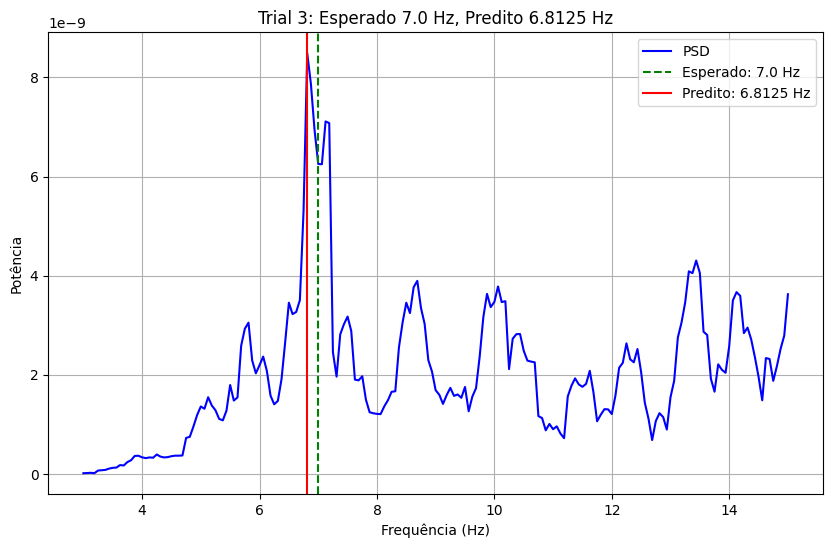

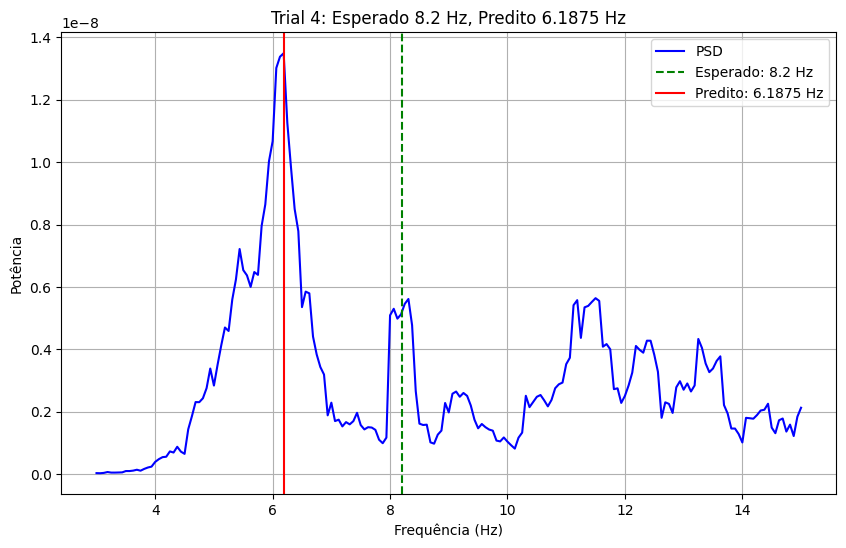

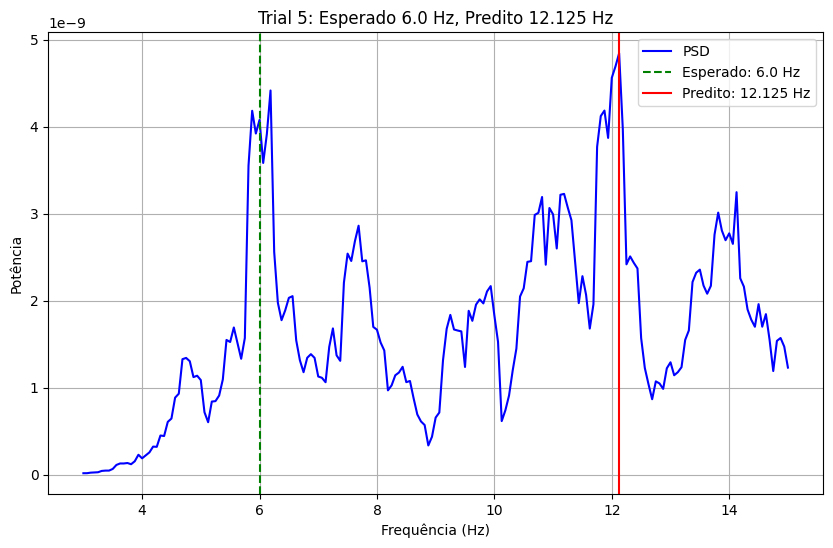

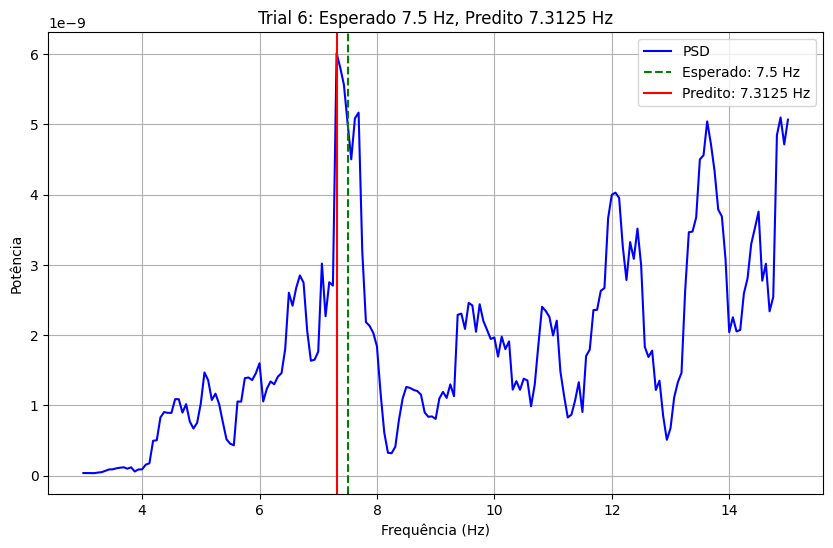

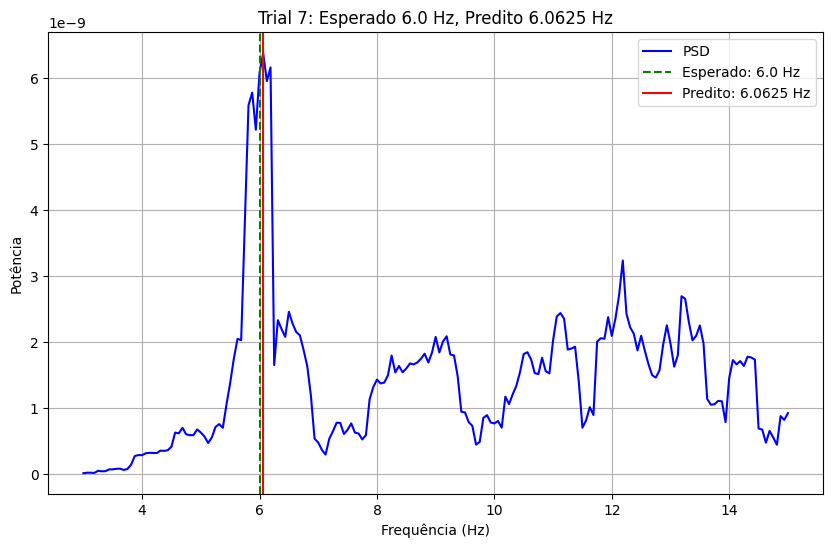

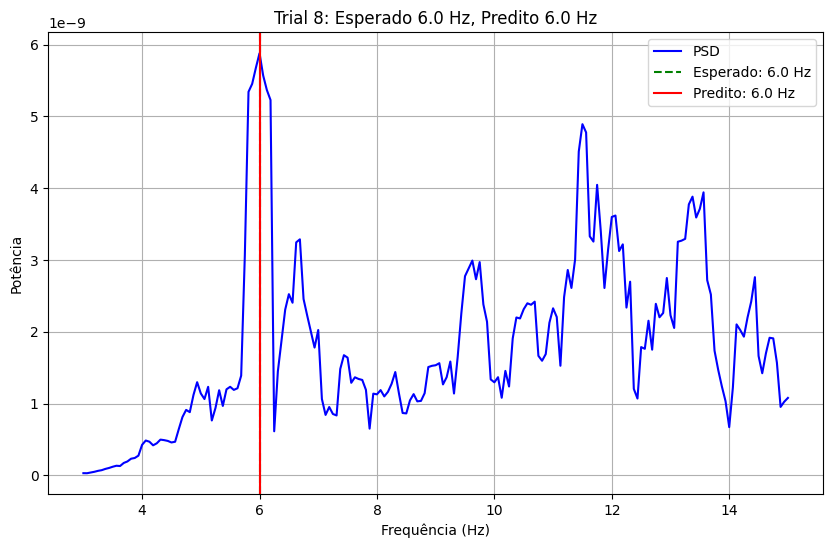

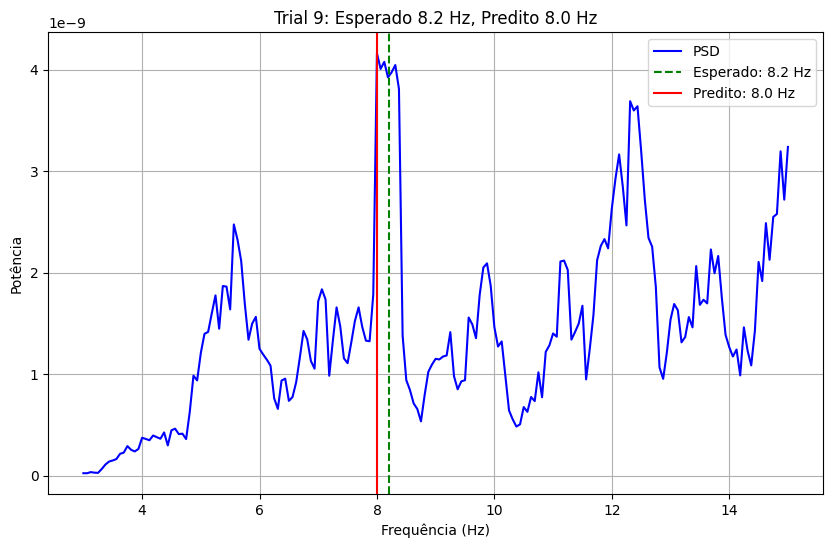

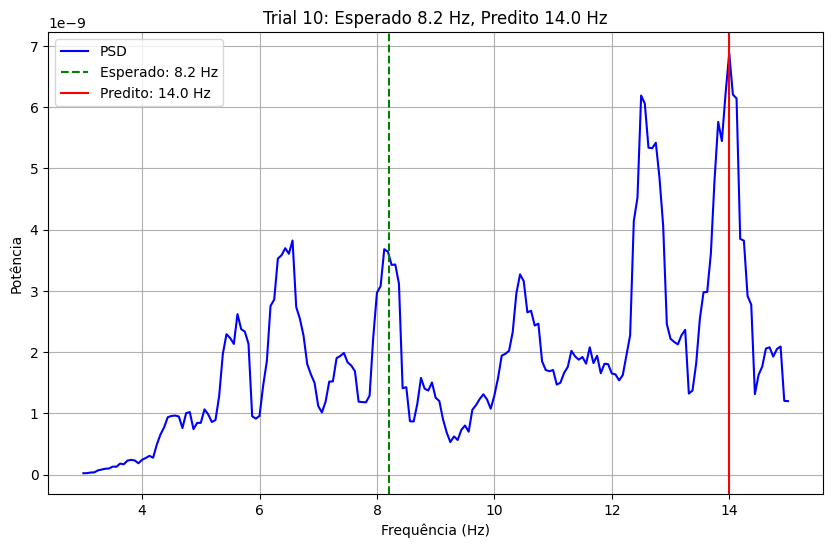

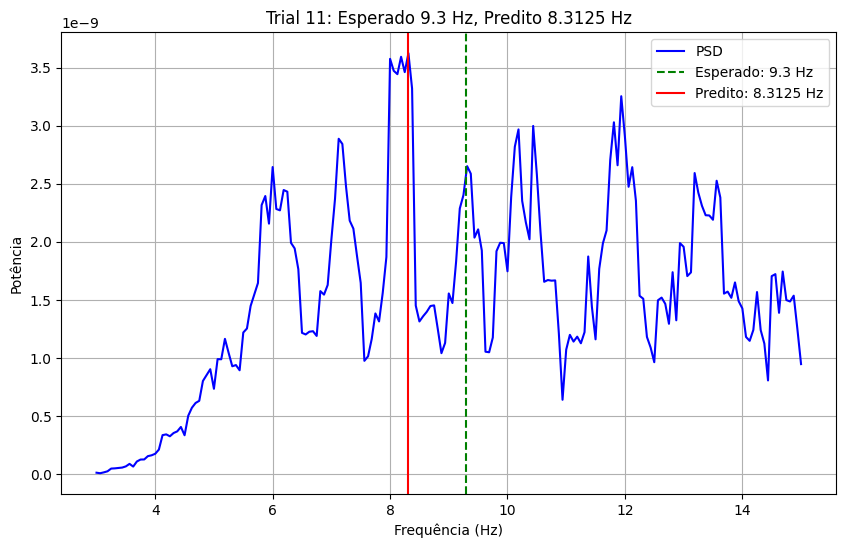

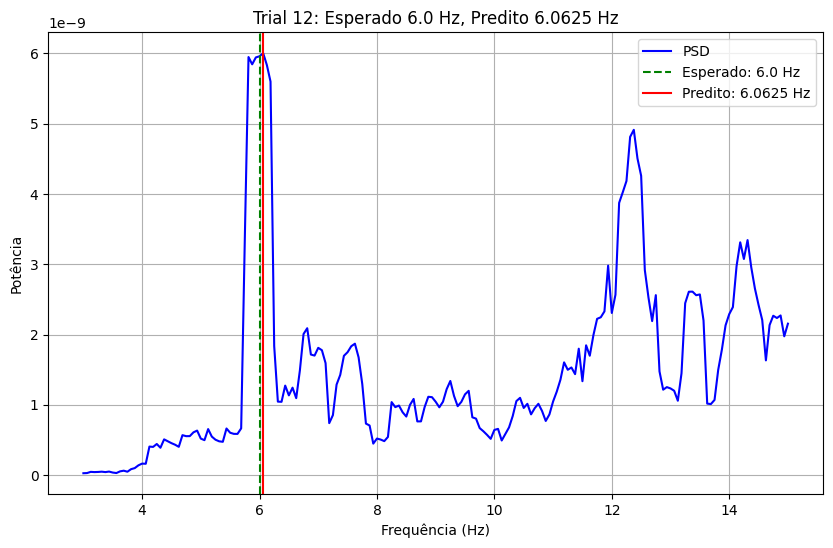

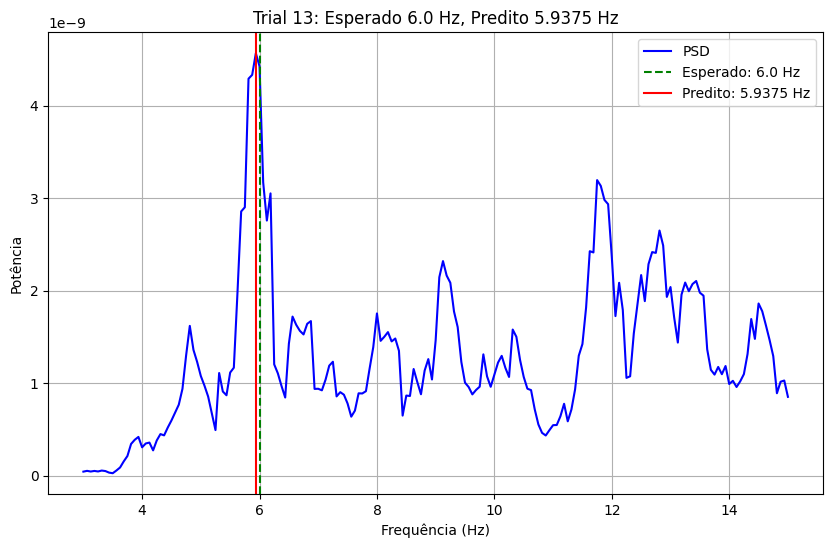

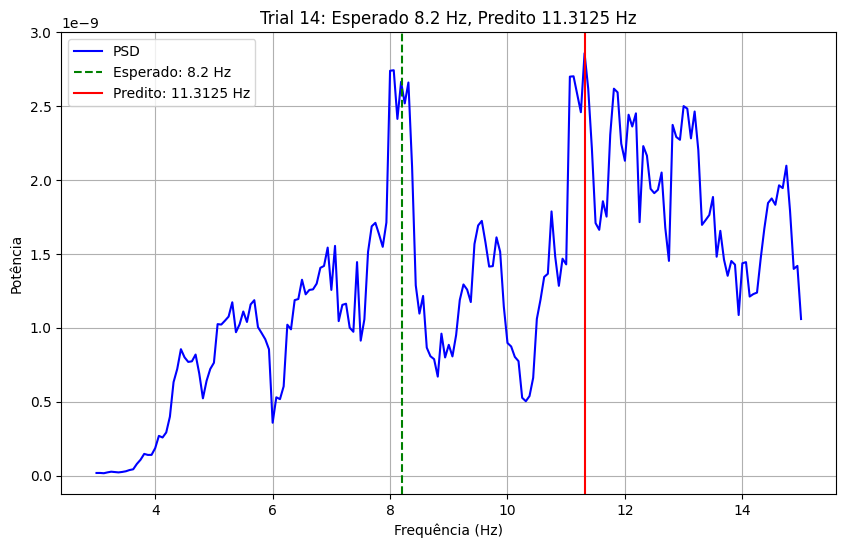

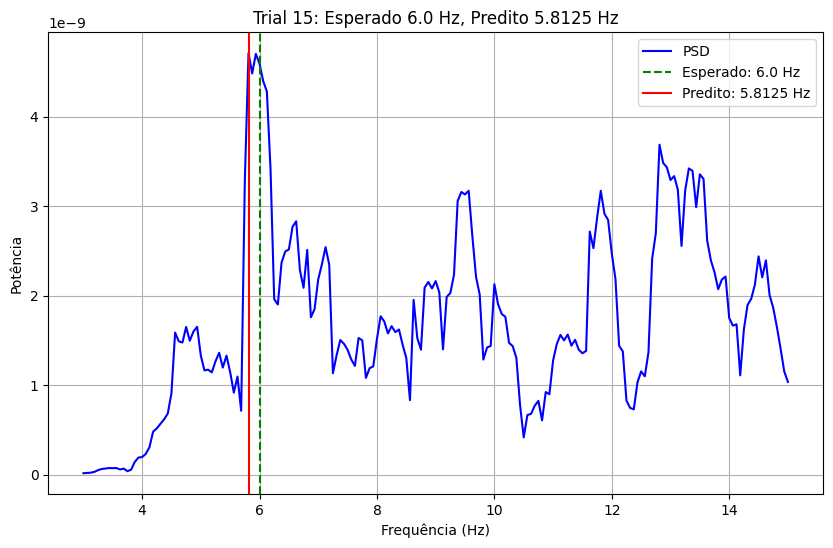

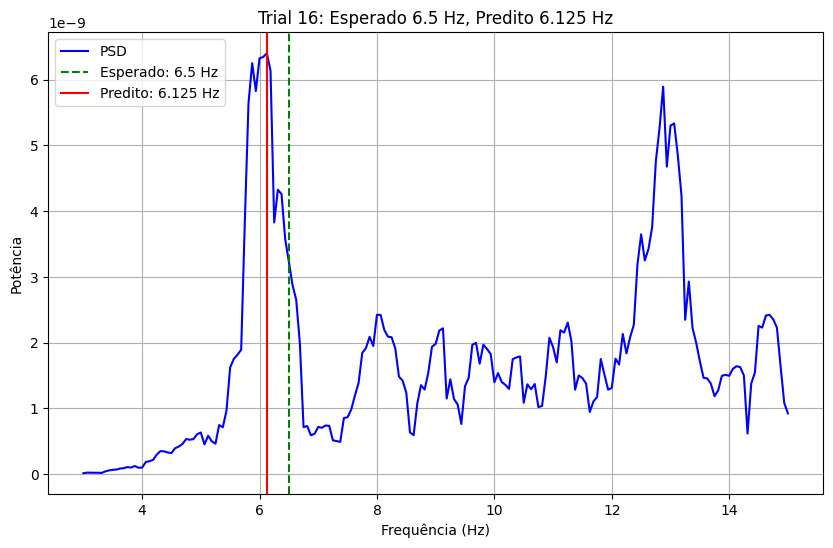

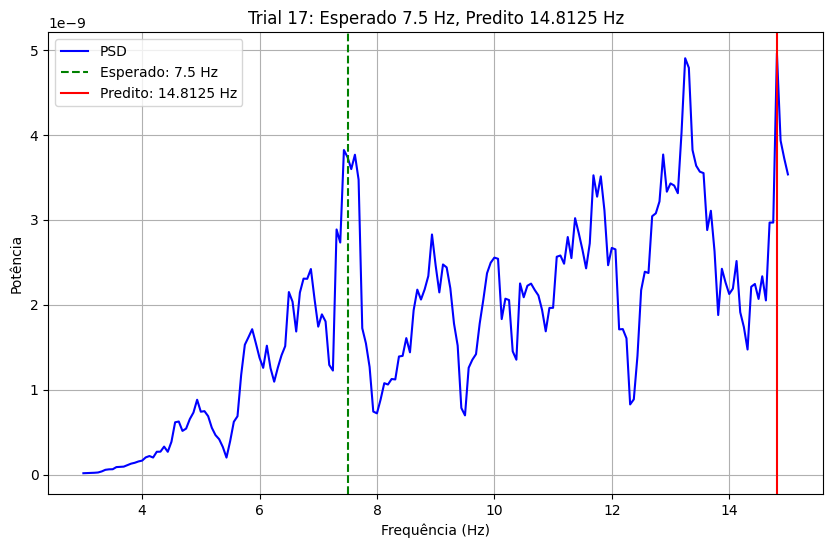

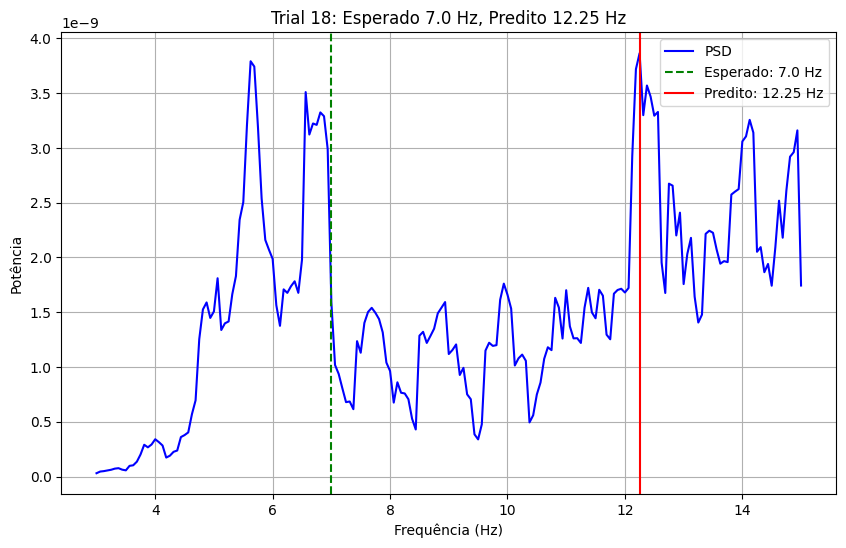

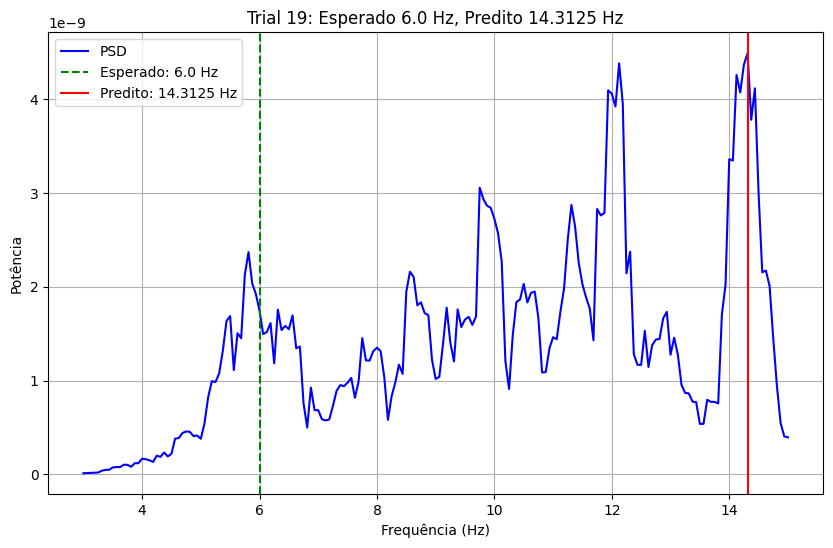

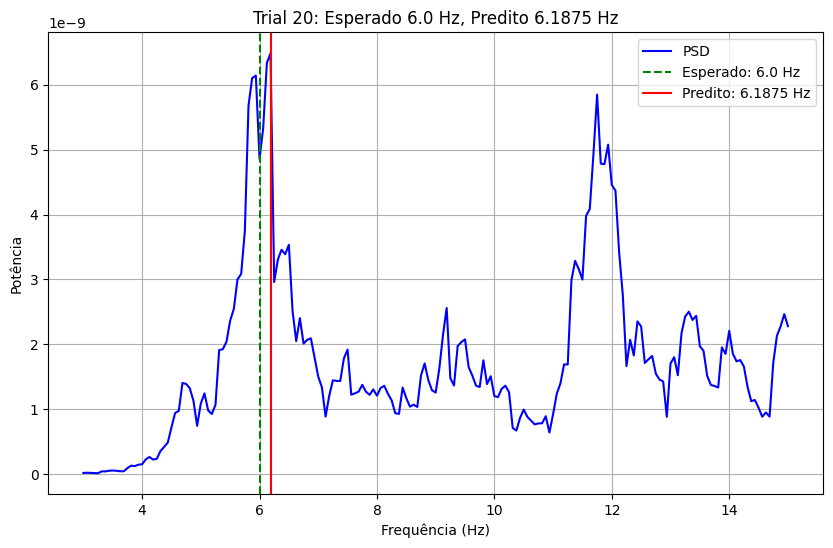

In [ ]:
import mne
import numpy as np

# Passo 1: Carregar o arquivo .fif
epochs = mne.read_epochs('ssvep-epo.fif')
# Frequências esperadas para os eventos
frequencies = [6.0, 6.5, 7.0, 7.5, 8.2, 9.3]

# Passo 2: Obter a energia do sinal com `compute_psd`
psd_obj = epochs.compute_psd(method='multitaper', fmin=3, fmax=15, verbose=False)
psds = psd_obj.get_data()  # Obter os dados da PSD
freqs = psd_obj.freqs      # Frequências correspondentes

# Passo 3: Encontrar o valor máximo para cada _trial_
predicted_labels = []
acertos = 0
event_labels = epochs.events[:, -1]  # Rótulos dos eventos (frequências evocadas)

for i in range(100):
    # Encontrar índice de maior potência
    max_idx = np.argmax(psds[i])
    max_freq = freqs[max_idx]

    # Adicionar a frequência prevista à lista
    predicted_labels.append(max_freq)

    # Comparar com a frequência evocada
    evoked_label = event_labels[i]  # Rótulo do evento
    evoked_freq = frequencies[int(evoked_label)]  # Frequência evocada

    if abs(max_freq - evoked_freq) <= 0.5:  # Critério de tolerância de 0.5 Hz
        acertos += 1

# Calcular e exibir a acurácia
total_trials = 100
acuracia = (acertos / total_trials) * 100
print(f"Acurácia: {acuracia:.2f}%")

# Passo 5: Visualizar alguns exemplos
import matplotlib.pyplot as plt

# Gerar gráficos para os 20 primeiros trials
for i in range(20):  
    plt.figure(figsize=(10, 6))
    
    # Plotar a PSD para o trial i
    plt.plot(freqs, psds[i, 0, :], label='PSD', color='blue')
    
    # Adicionar linha para a frequência esperada
    plt.axvline(x=true_labels[i], color='green', linestyle='--', label=f'Esperado: {true_labels[i]} Hz')
    
    # Adicionar linha para a frequência predita
    plt.axvline(x=predicted_labels[i], color='red', linestyle='-', label=f'Predito: {predicted_labels[i]} Hz')
    
    # Configurações do gráfico
    plt.title(f"Trial {i+1}: Esperado {true_labels[i]} Hz, Predito {predicted_labels[i]} Hz")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Potência")
    plt.grid(True)
    plt.legend()
    
    # Mostrar o gráfico
    plt.show()